In [ ]:
import os
import sys
sys.path.append('/scratch_tmp/users/k21066795/NBT-phenotyping')
import scanpy as sc
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils_pheno import *

In [ ]:
model_stains = ['gigapath_aug', 'UNI_aug', 'iBOT_aug', 'EXAONEPath_aug', 'conch_rein', 'gigapath_rein', 'UNI_rein', 
                'iBOT_rein', 'EXAONEPath_rein', 'conch_orig', 'UNI_orig', 'gigapath_orig', 'iBOT_orig', 'EXAONEPath_orig']

for model_stain in model_stains:
    knn_df = get_KNN_data(model_stain)
    run_KNN(knn_df, save_pt=None)
    adata = get_adata(knn_df)
    adata = run_leiden_umap(resolution=0.5)
    adata.write(f'/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/adata/adata_{model_stain}_resolution{resolution}.h5ad')

In [16]:
folder = '/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/KNN_probe'
df_all = pd.DataFrame()
for i in os.listdir(folder):
    if '.csv' in i:
        file = os.path.join(folder, i)  # Use os.path.join for better compatibility
        df = pd.read_csv(file)  # Read each CSV file
        model_stain = f"{i.split('_')[2]}_{i.split('_')[3]}"
        df['model_stain'] = model_stain
        df_all = pd.concat([df_all, df], ignore_index=True)  # Concatenate and reset index
df_all['mean_test_score'] = df_all[['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']].mean(axis=1)
df_all['model'] = [i.split('_')[0] for i in list(df_all['model_stain'])]
df_all['stain'] = [i.split('_')[1] for i in list(df_all['model_stain'])]
df_all

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.371883      0.017914        52.819881        0.129404   
1         0.379817      0.003139        52.949021        0.007955   
2         0.382608      0.004992        52.997364        0.123469   
3         0.382434      0.002255        53.419581        0.007126   
4         0.383560      0.003505        54.050400        0.008212   
..             ...           ...              ...             ...   
100       0.469319      0.011460        19.652419        1.500368   
101       0.497222      0.063397        21.507993        2.688995   
102       0.515992      0.075280        20.861882        0.543615   
103       0.510065      0.067707        19.369784        1.706727   
104       0.468437      0.010697        20.894423        2.259342   

     param_n_neighbors  split0_test_score  split1_test_score  \
0                    8           0.812472           0.810593   
1                   16           0.808437           0.809100   
2                   32           0.799591           0.801636   
3                   64           0.788092           0.791298   
4                  128           0.772722           0.773883   
..                 ...                ...                ...   
100                 32           0.932992           0.928697   
101                 64           0.912014           0.905902   
102                128           0.888559           0.883328   
103                256           0.862075           0.856073   
104                512           0.833554           0.831957   

     split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0             0.811588           0.811533           0.809642         0.811166   
1             0.811588           0.809708           0.808592         0.809485   
2             0.801249           0.798651           0.798142         0.799854   
3             0.790966           0.785106           0.784376         0.787968   
4             0.774934           0.769847           0.770111         0.772300   
..                 ...                ...                ...              ...   
100           0.926880           0.927427           0.928803         0.928960   
101           0.906068           0.907494           0.908595         0.908015   
102           0.884099           0.885854           0.879963         0.884360   
103           0.858716           0.858543           0.849788         0.857039   
104           0.831406           0.832994           0.825615         0.831105   

     std_test_score  rank_test_score  n_neighbors model_stain model stain  
0          0.000966                1            8    iBOT_aug  iBOT   aug  
1          0.001142                2           16    iBOT_aug  iBOT   aug  
2          0.001384                3           32    iBOT_aug  iBOT   aug  
3          0.002870                4           64    iBOT_aug  iBOT   aug  
4          0.002021                5          128    iBOT_aug  iBOT   aug  
..              ...              ...          ...         ...   ...   ...  
100        0.002146                3           32   iBOT_orig  iBOT  orig  
101        0.002230                4           64   iBOT_orig  iBOT  orig  
102        0.002840                5          128   iBOT_orig  iBOT  orig  
103        0.004097                6          256   iBOT_orig  iBOT  orig  
104        0.002847                7          512   iBOT_orig  iBOT  orig  

[105 rows x 17 columns]

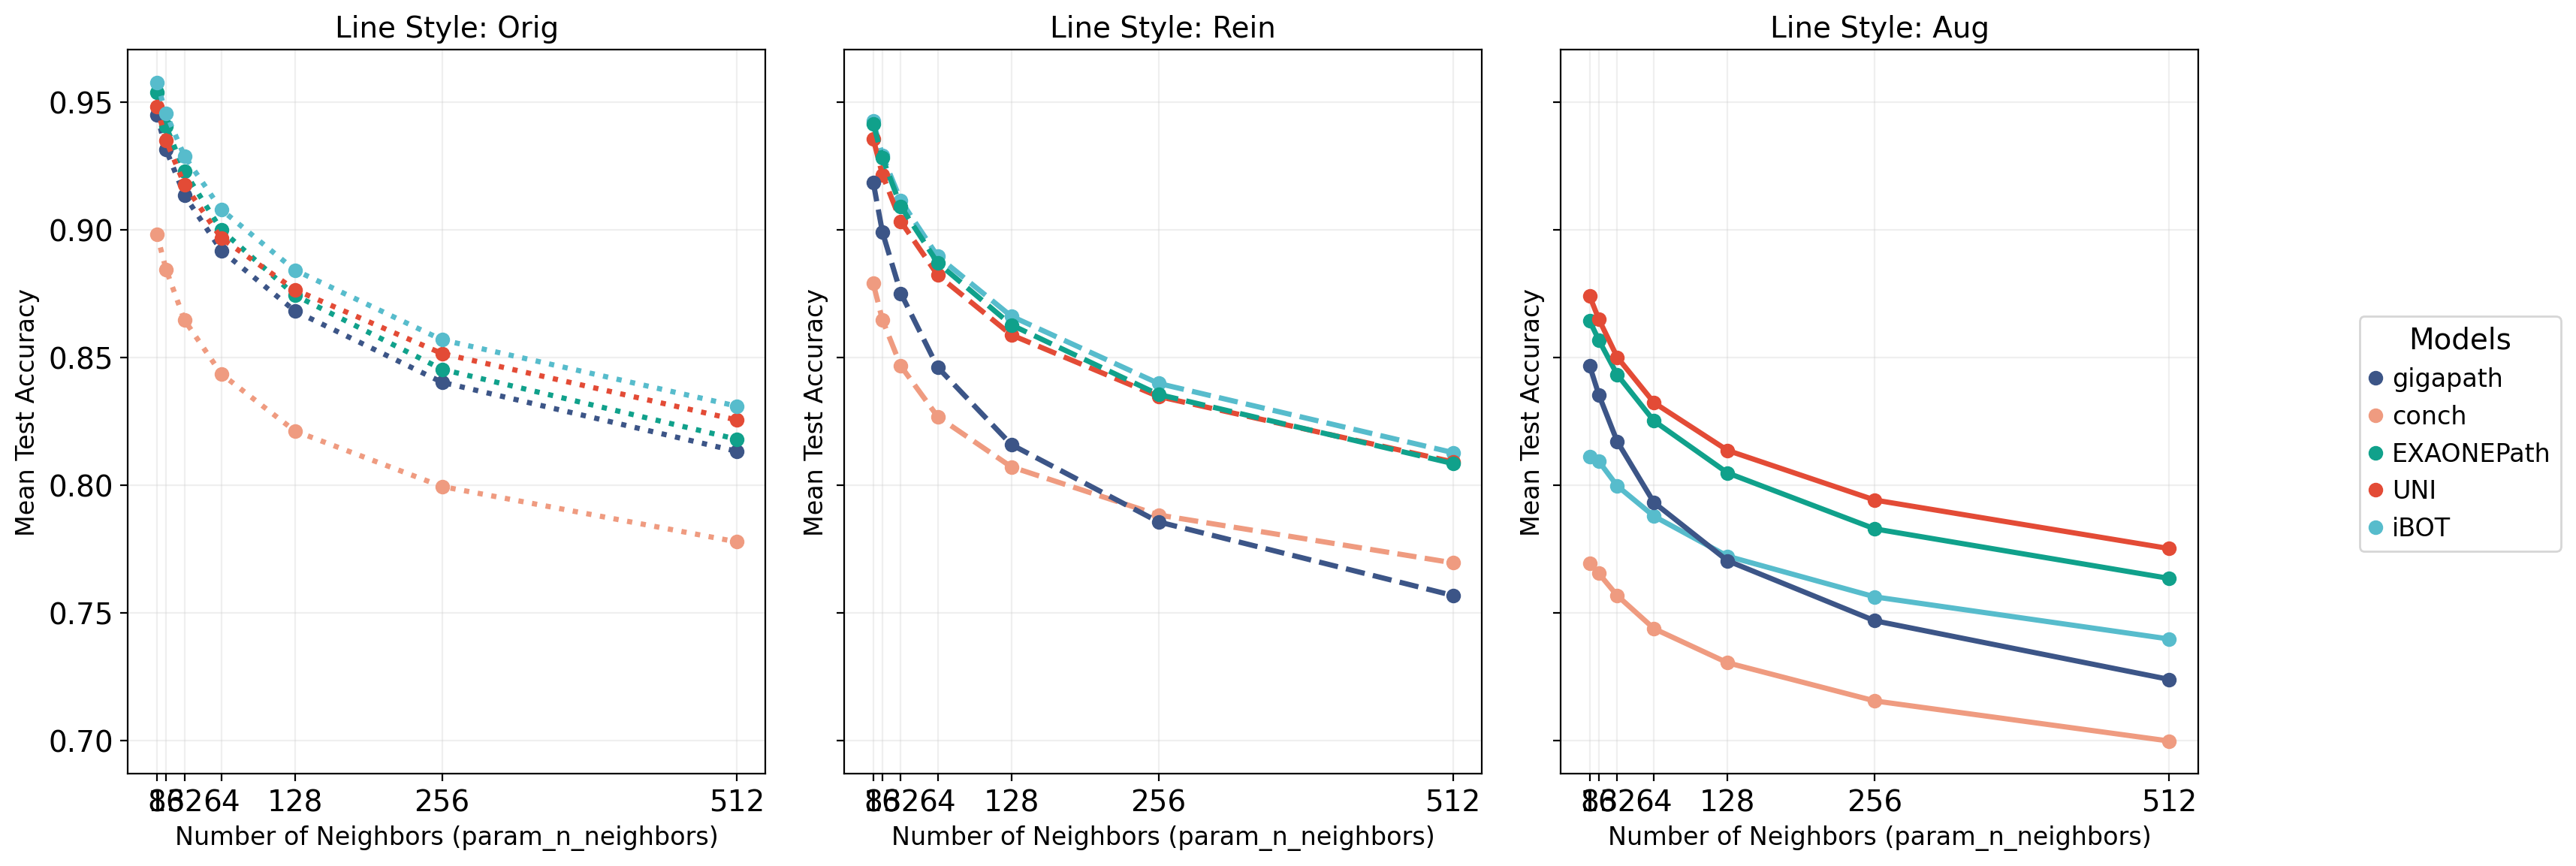

In [43]:
knn_acc_lineplot(df_all, save_pt=None)

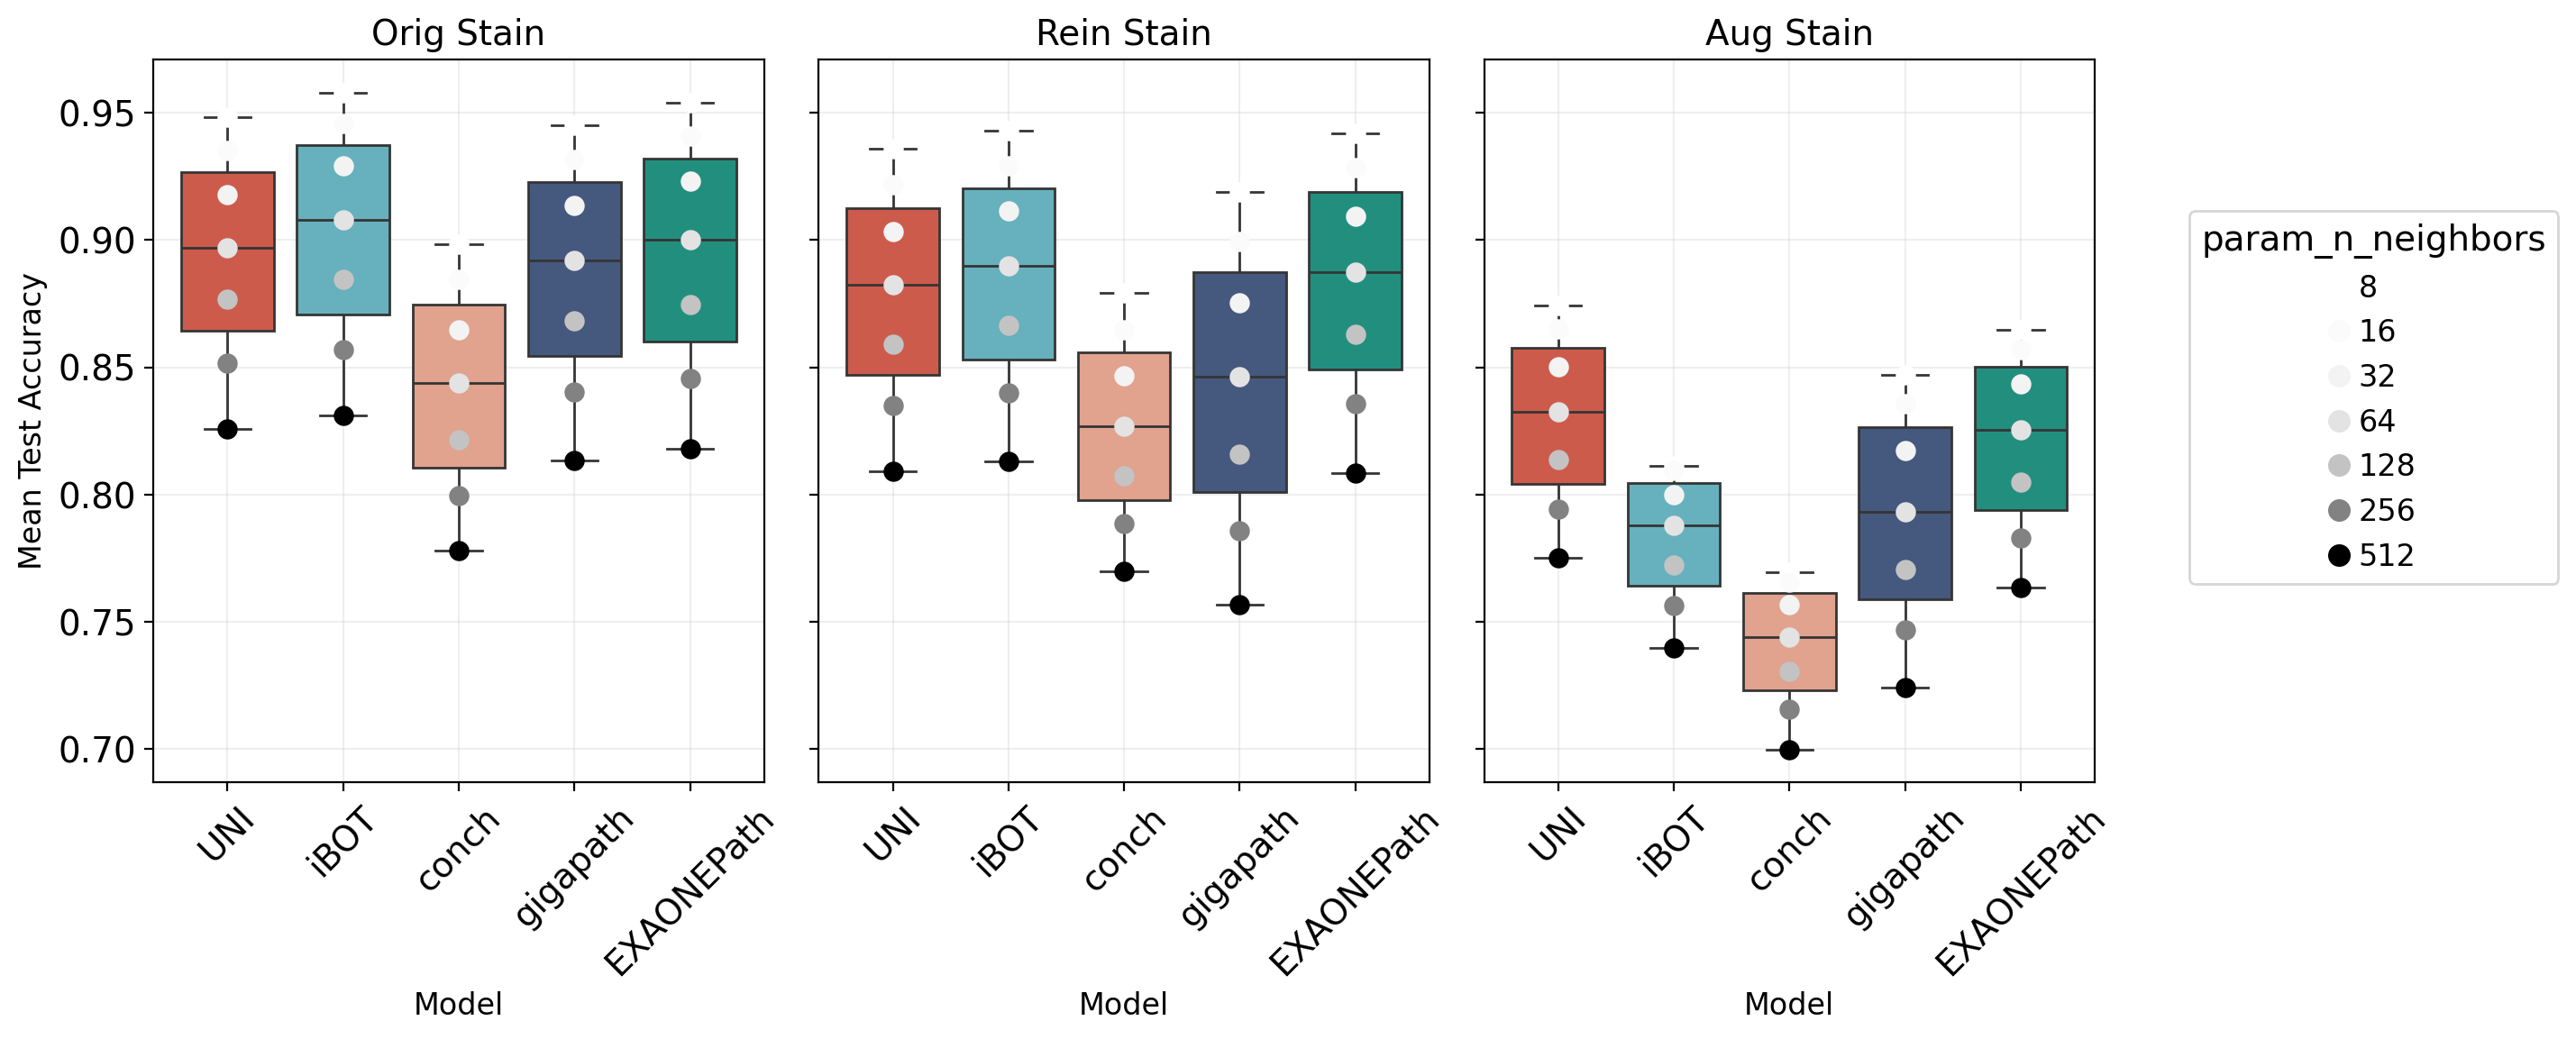

In [42]:
knn_acc_boxplot(df_all, save_pt=None)

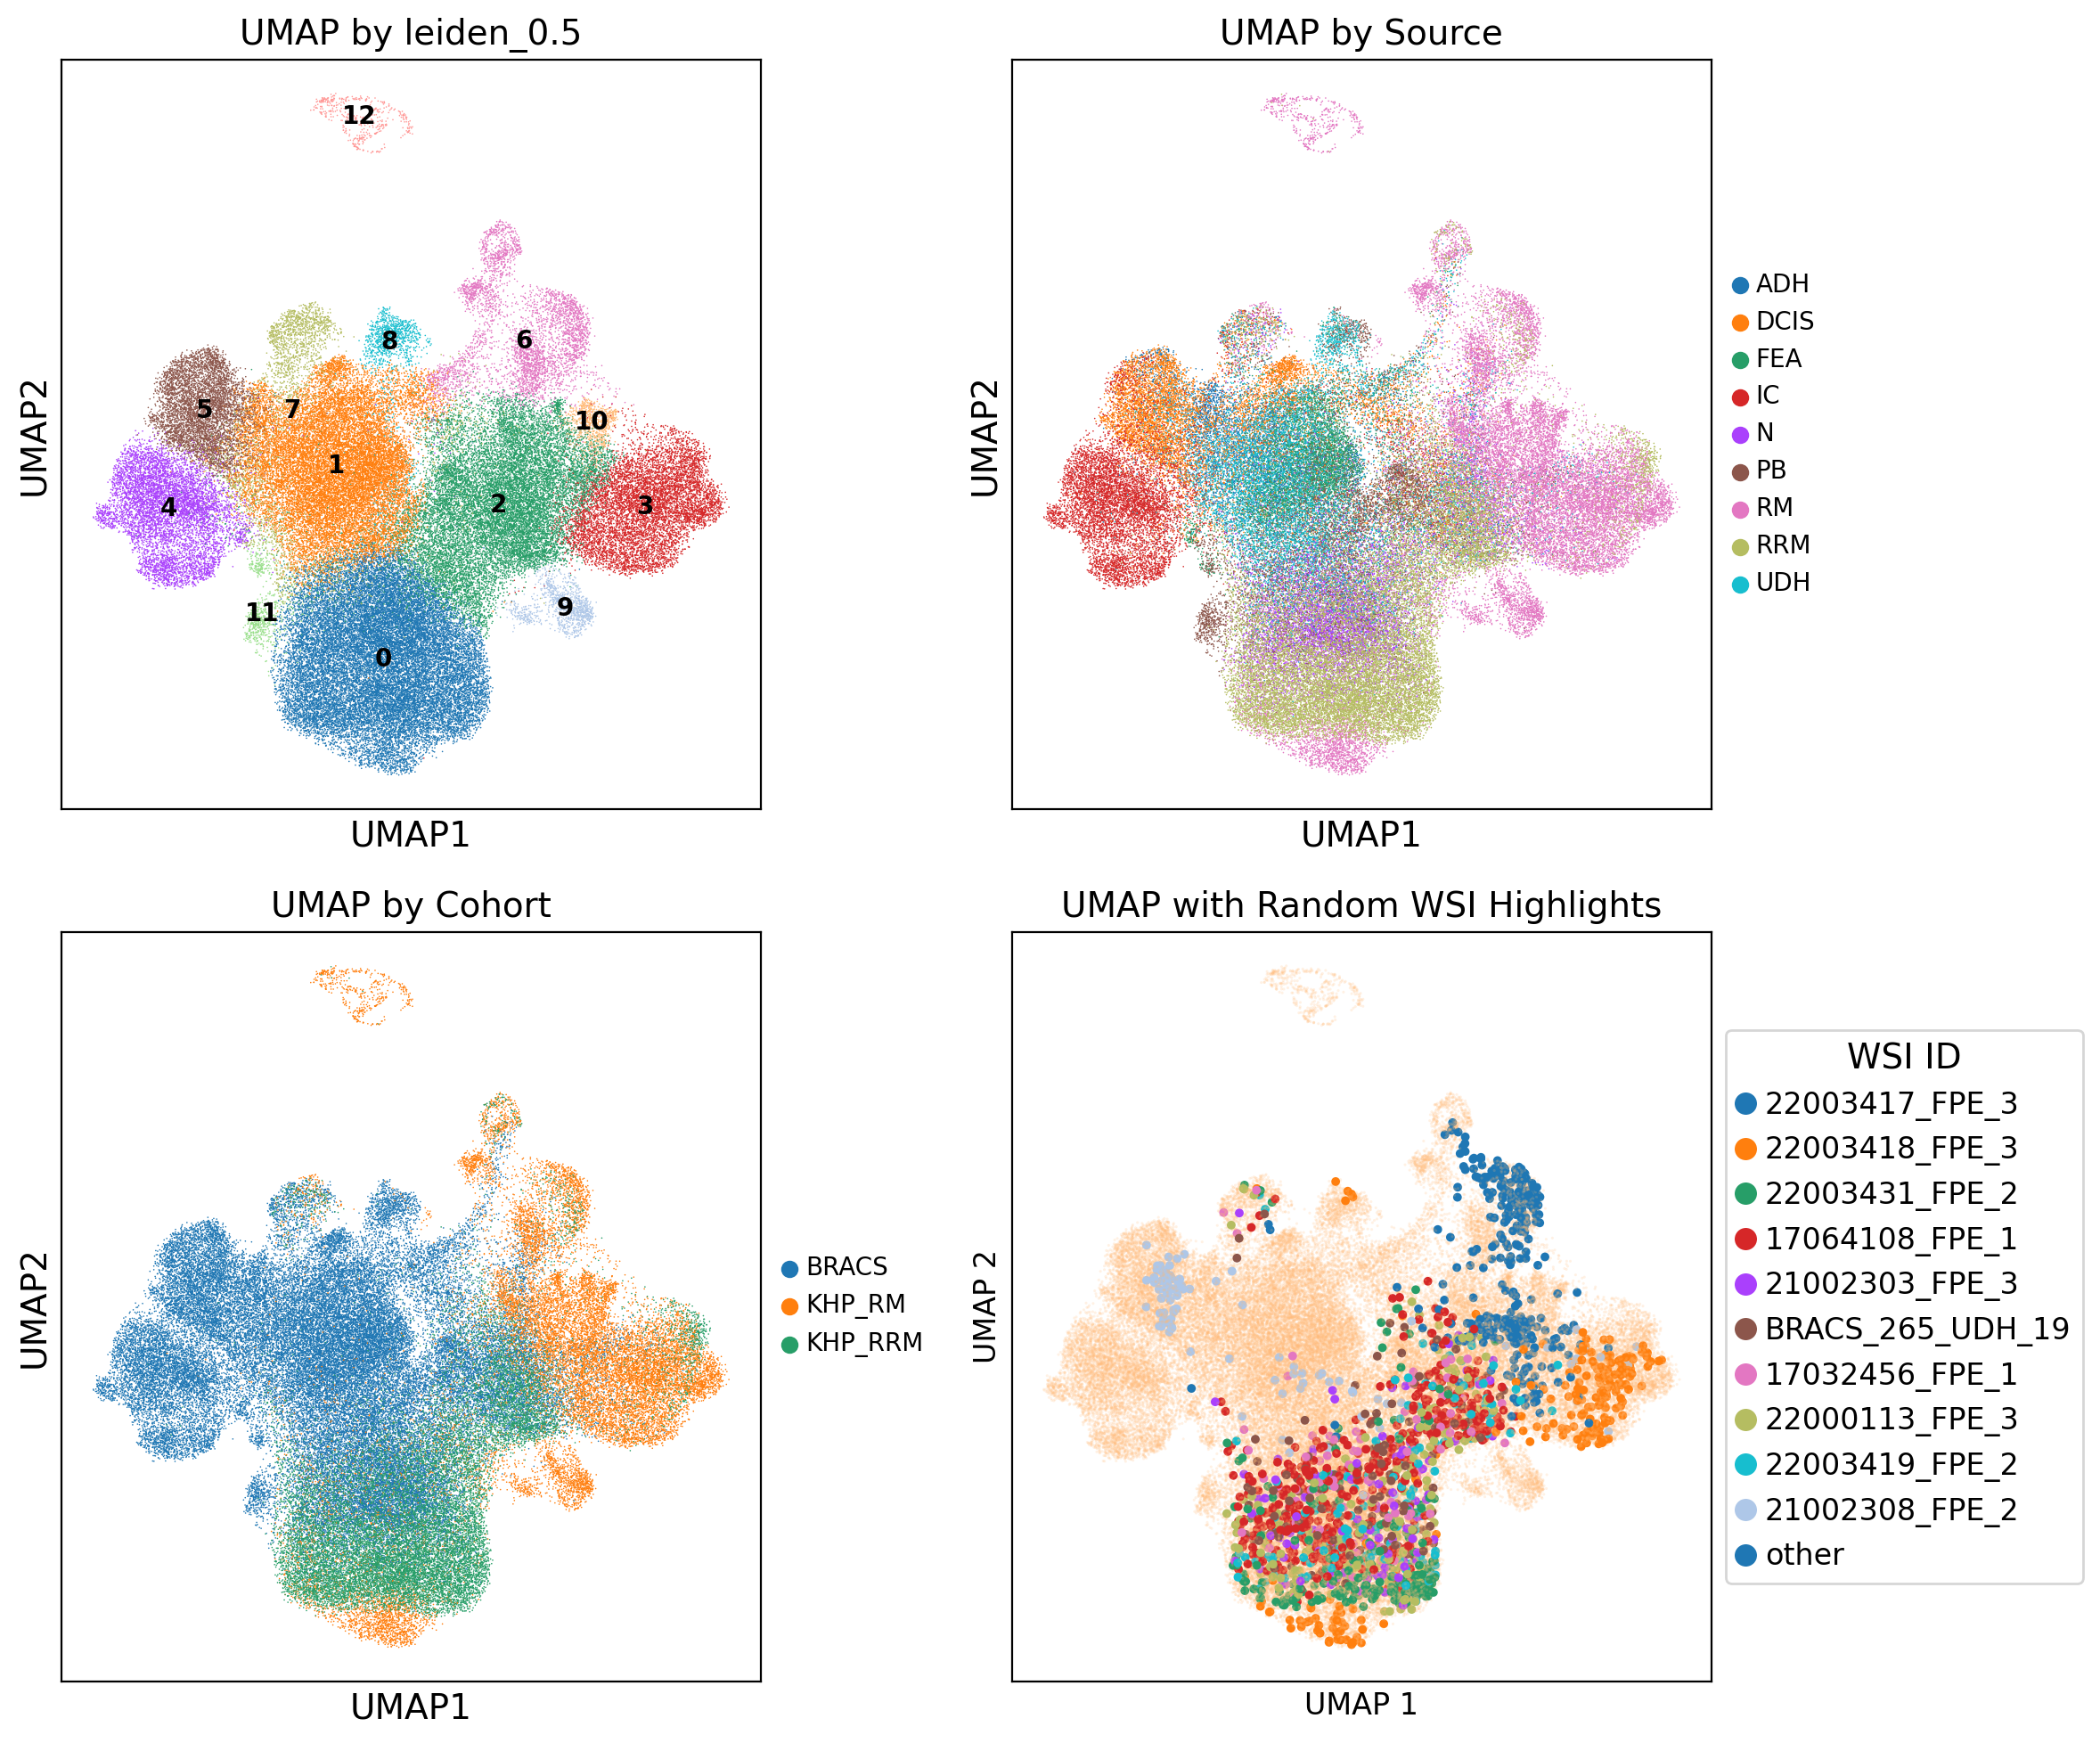

In [10]:
sc.set_figure_params(scanpy=True, dpi=100)
sc.settings.figdir = '/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/'

model_stain='UNI_aug'
file_path = f'/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/adata/adata_{model_stain}_resolution{resolution}.h5ad'
adata = sc.read_h5ad(file_path)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sc.pl.umap(adata, color=groupby, legend_fontsize=10, legend_loc='on data', ax=axes[0, 0], show=False)
axes[0, 0].set_title(f'UMAP by {groupby}')
sc.pl.umap(adata, color="source", legend_fontsize=10, ax=axes[0, 1], show=False)
axes[0, 1].set_title('UMAP by Source')
sc.pl.umap(adata, color="cohort", legend_fontsize=10, ax=axes[1, 0], show=False)
axes[1, 0].set_title('UMAP by Cohort')
plot_umap_with_random_wsi(adata, n_iterations=10, ax=axes[1, 1])
axes[1, 1].set_title('UMAP with Random WSI Highlights')
plt.tight_layout()
# plt.savefig(f'/scratch_tmp/{model_stain}_umap_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

/scratch_tmp/users/k21066795/NBT-phenotyper/utils_pheno.py:433: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  


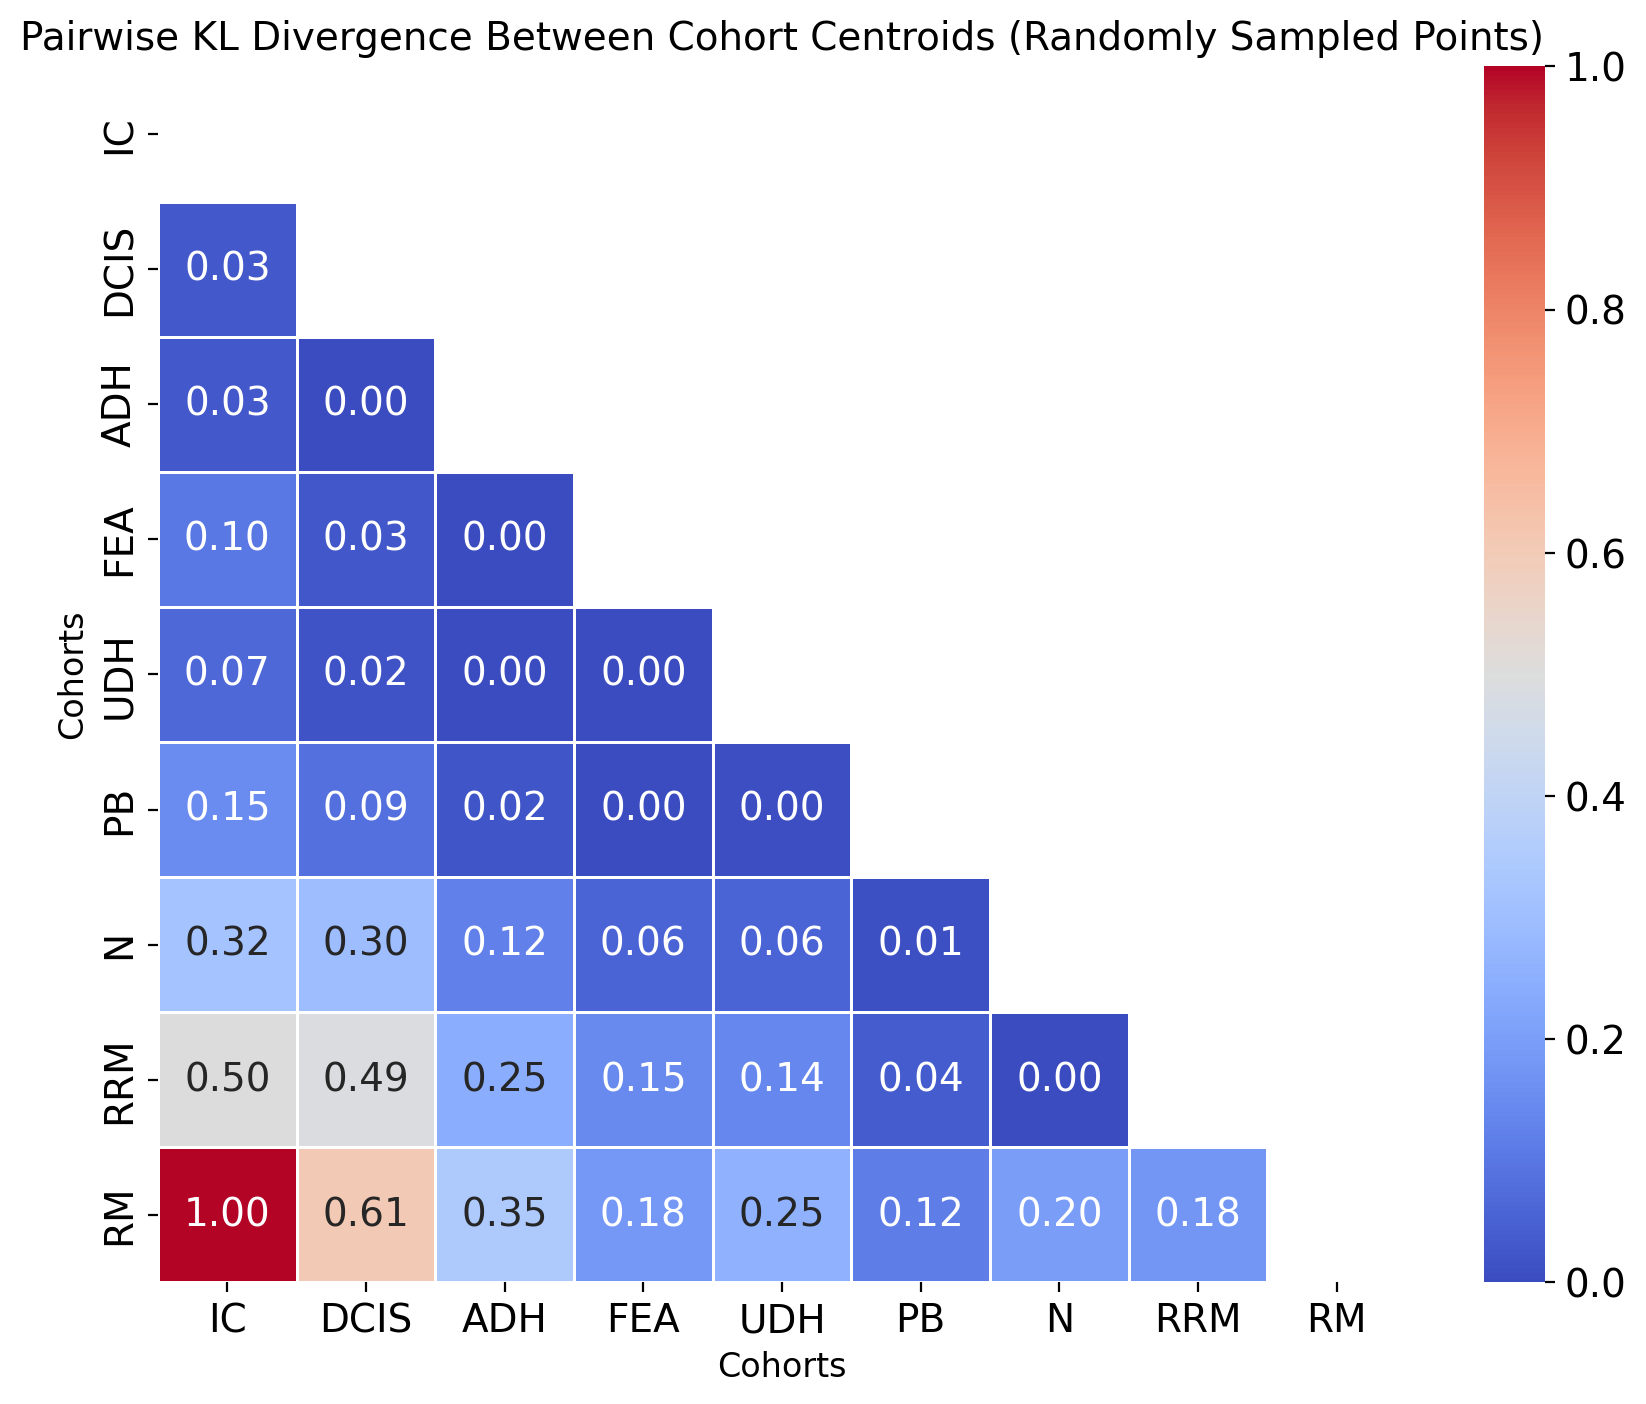

In [13]:
# save_pt = f'/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/heatmap/{model_stain}_heatmap_kld.pdf'
plot_kl_divergence_heatmap(adata, normalization='minmax', save_pt=None)